In [3]:
import numpy as np
import os
import cv2
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import keras
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from keras import optimizers
import matplotlib.pyplot as plt
%matplotlib inline
keras.__version__

Using TensorFlow backend.


'2.3.1'

In [109]:
width = 28
height = 28

In [110]:
base_dir = '/Users/joannakang/Desktop/study/RSP'

In [111]:
train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")

In [112]:
#분류하고자하는 대상 = class
class_name = os.listdir(train_dir)
print (class_name)

['paper', '.DS_Store', 'rock', 'scissors']


In [113]:
class_name.remove('.DS_Store')

In [114]:
print(class_name)

['paper', 'rock', 'scissors']


In [115]:
train_image = []
train_label = []
test_image = []
test_label = []

In [116]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(class_name)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

print(onehot_encoded)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


/Users/joannakang/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [117]:
for i in range(len(class_name)):
    path = os.path.join(train_dir, class_name[i]) #폴더까지의 경로
    img_list = os.listdir(path)
    for j in img_list:
        img = os.path.join(path, j) #파일까지의 경로
        img = cv2.imread(img, cv2.IMREAD_GRAYSCALE) #파일을 읽어온다
        img = cv2.resize(img, (width, height), interpolation = cv2.INTER_CUBIC)
        img = img.reshape((width, height, 1))
        train_image.append(img)
        train_label.append(onehot_encoded[i])

In [118]:
for i in range(len(class_name)):
    path = os.path.join(test_dir, class_name[i])
    img_list = os.listdir(path)
    for j in img_list:
        img = os.path.join(path, j)
        img = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (width, height), interpolation = cv2.INTER_CUBIC)
        img = img.reshape((width, height, 1))
        test_image.append(img)
        test_label.append(onehot_encoded[i])

In [119]:
print(len(train_input))
print(len(train_label))
print(len(test_input))
print(len(test_label))

85
85
15
15


In [120]:
train_image = np.array(train_input)
train_label = np.array(train_label)
test_image = np.array(test_input)
test_label = np.array(test_label)
print(train_input.shape)
print(test_input.shape)

(85, 28, 28, 1)
(15, 28, 28, 1)


In [121]:
a = train_input[1].reshape(28, 28)

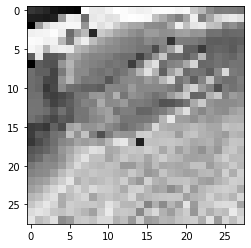

In [122]:
plt.imshow(a, cmap = 'Greys')

In [123]:
print(train_input.shape)
print(train_label.shape)

(85, 28, 28, 1)
(85, 3)


In [124]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (width, height, train_input.shape[3])))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(16, activation = 'relu'))
model.add(Dense(train_label.shape[1], activation = 'softmax'))

In [125]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 3, 3, 32)          9248      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 32)               

In [126]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [127]:
loss_type = 'mean_squared_error', 'binary_crossentropy', 'categorical_crossentropy'

In [128]:
model.fit(x = train_image, y = train_label, batch_size = 5, epochs = 100)

Epoch 1/100
85/85 [==============================] - 0s 2ms/step - loss: 4.9560 - accuracy: 0.2941
Epoch 2/100
85/85 [==============================] - 0s 872us/step - loss: 1.8015 - accuracy: 0.3529
Epoch 3/100
85/85 [==============================] - 0s 877us/step - loss: 1.1232 - accuracy: 0.4706
Epoch 4/100
85/85 [==============================] - 0s 882us/step - loss: 1.0939 - accuracy: 0.5412
Epoch 5/100
85/85 [==============================] - 0s 985us/step - loss: 1.1420 - accuracy: 0.5176
Epoch 6/100
85/85 [==============================] - 0s 2ms/step - loss: 1.0564 - accuracy: 0.5529
Epoch 7/100
85/85 [==============================] - 0s 1ms/step - loss: 0.8773 - accuracy: 0.6235
Epoch 8/100
85/85 [==============================] - 0s 880us/step - loss: 0.8656 - accuracy: 0.5647
Epoch 9/100
85/85 [==============================] - 0s 899us/step - loss: 0.7430 - accuracy: 0.6118
Epoch 10/100
85/85 [==============================] - 0s 866us/step - loss: 0.7231 - accuracy: 0.

85/85 [==============================] - 0s 1ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 82/100
85/85 [==============================] - 0s 828us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 83/100
85/85 [==============================] - 0s 834us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 84/100
85/85 [==============================] - 0s 838us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 85/100
85/85 [==============================] - 0s 850us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 86/100
85/85 [==============================] - 0s 851us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 87/100
85/85 [==============================] - 0s 818us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 88/100
85/85 [==============================] - 0s 827us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 89/100
85/85 [==============================] - 0s 972us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 90/100
85/85 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 1.00

In [129]:
loss_and_accuracy = model.evaluate(x = test_input, y = test_label)
print(loss_and_accuracy)

15/15 [==============================] - 0s 2ms/step
[6.407425880432129, 0.13333334028720856]


In [130]:
yhat_test = model.predict(test_input, batch_size=32)

In [131]:
print(yhat_test)

[[1.9126093e-04 5.2216876e-01 4.7763994e-01]
 [3.3306409e-02 9.6001935e-01 6.6742436e-03]
 [8.8422641e-04 9.9906498e-01 5.0820548e-05]
 [2.3788096e-01 7.6210815e-01 1.0861277e-05]
 [6.4721070e-07 7.9272902e-01 2.0727031e-01]
 [3.4233577e-07 7.8189418e-02 9.2181027e-01]
 [6.1661473e-07 4.0012810e-02 9.5998651e-01]
 [1.4264224e-05 8.2153390e-05 9.9990356e-01]
 [5.8720536e-13 6.7876681e-06 9.9999321e-01]
 [7.2002697e-01 4.8037712e-02 2.3193526e-01]
 [8.8789219e-01 1.1208146e-01 2.6394335e-05]
 [1.6873816e-04 9.9934214e-01 4.8910244e-04]
 [1.7290551e-05 1.2594323e-02 9.8738843e-01]
 [2.3197724e-02 9.7679943e-01 2.8468380e-06]
 [7.2908304e-05 3.1096172e-01 6.8896538e-01]]


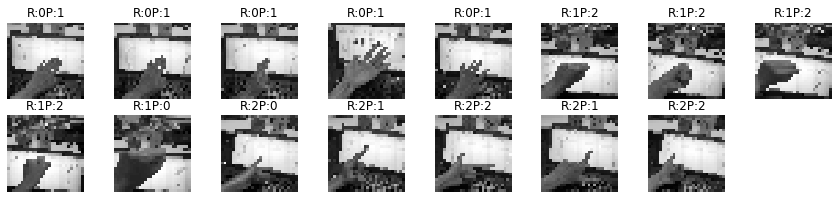

In [133]:
plt.figure(figsize=(15, 15))

for i in range(len(test_image)):
    plt.subplot(9, 8, i + 1)
    plt.axis('off')
    img = test_input[i].reshape(28, 28)
    plt.imshow(img, cmap = 'gray')
    plt.title('R:' + str(np.argmax(test_label[i])) + 'P:' + str(np.argmax(yhat_test[i])))